## Imports: libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('../../dataset/KAG_energydata_complete.csv')

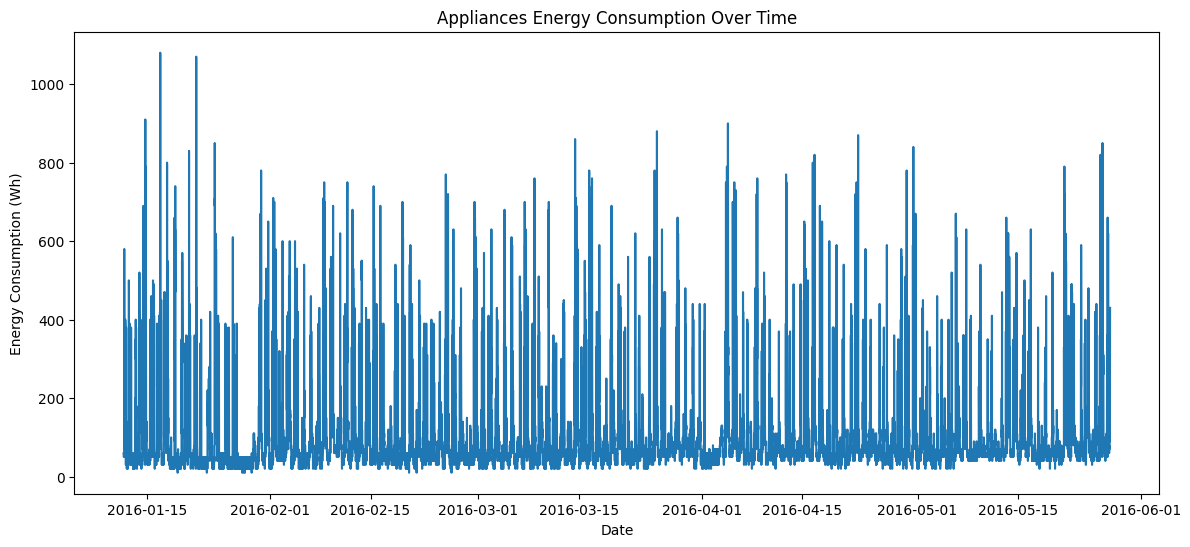

ADF Statistic: -21.61637819803621
p-value: 0.0


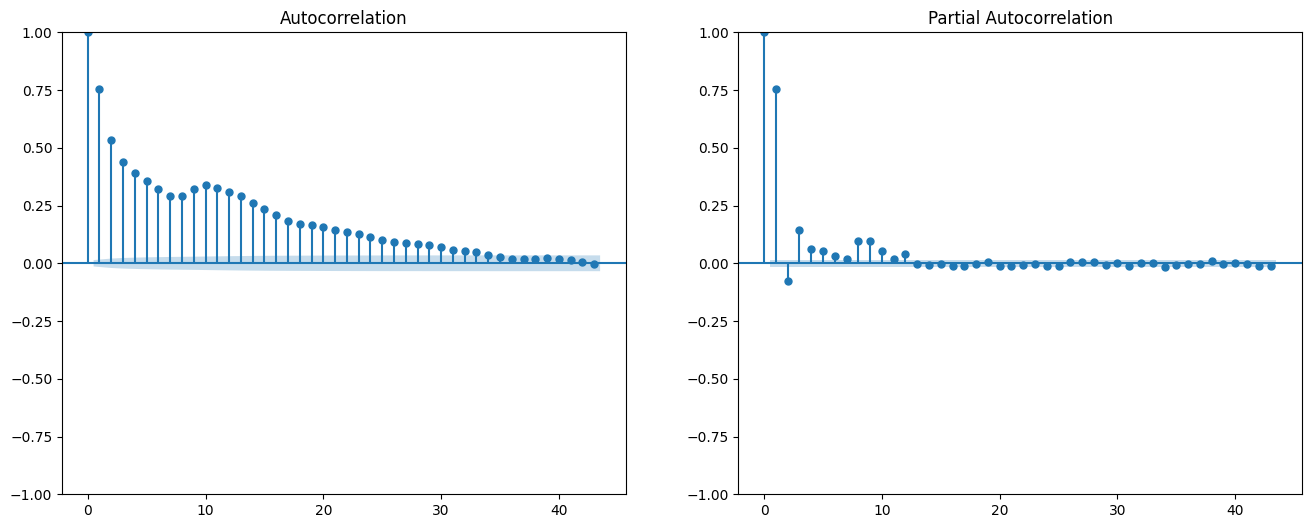

/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             Appliances   No. Observations:                19735
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -111025.652
Date:                Tue, 02 Jul 2024   AIC                         222059.303
Time:                        23:59:49   BIC                         222090.864
Sample:                    01-11-2016   HQIC                        222069.635
                         - 05-27-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.6950      3.373     28.963      0.000      91.084     104.306
ar.L1          0.6886      0.005    146.853      0.000       0.679       0.698
ma.L1          0.1485      0.005     30.377      0.0

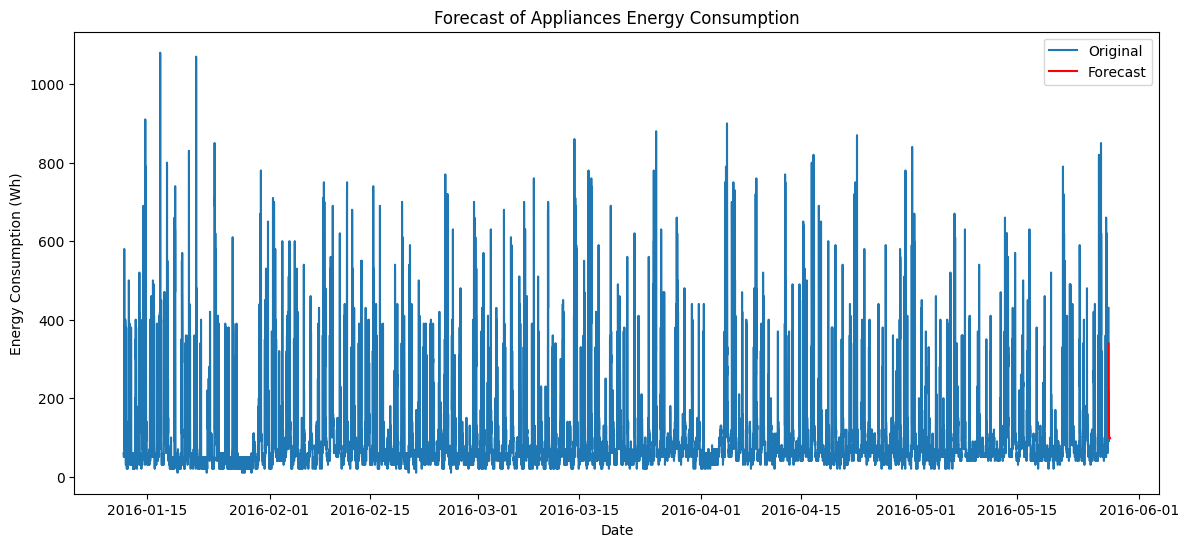

Mean Absolute Error: 58.172178233936954
Mean Squared Error: 9877.571605134011


In [3]:
# Convert the 'date' column to datetime format and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Focusing on the 'Appliances' energy consumption
series = df['Appliances']

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(series)
plt.title('Appliances Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
result = adfuller(series.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the series is not stationary, apply differencing
if result[1] > 0.05:
    series = series.diff().dropna()

# Plot ACF and PACF to determine p and q
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(series, ax=axes[0])
plot_pacf(series, ax=axes[1])
plt.show()

# Fit the ARIMA model (example with p=1, d=0, q=1, adjust these based on ACF and PACF plots)
model = ARIMA(series, order=(1, 0, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

# Forecast
forecast_steps = 30  # Forecast for 30 time steps ahead
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Forecast of Appliances Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.show()

# Evaluate the model
y_train = series[:-forecast_steps]
y_test = series[-forecast_steps:]
y_pred = forecast

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
/home/stas/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Appliances   No. Observations:                19735
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -110840.280
Date:                            Wed, 03 Jul 2024   AIC                         221690.560
Time:                                    00:14:31   BIC                         221729.998
Sample:                                01-11-2016   HQIC                        221703.473
                                     - 05-27-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6578      0.004    157.657      0.000       0.650       0.666
ma.L1         -0.9430      0.002   

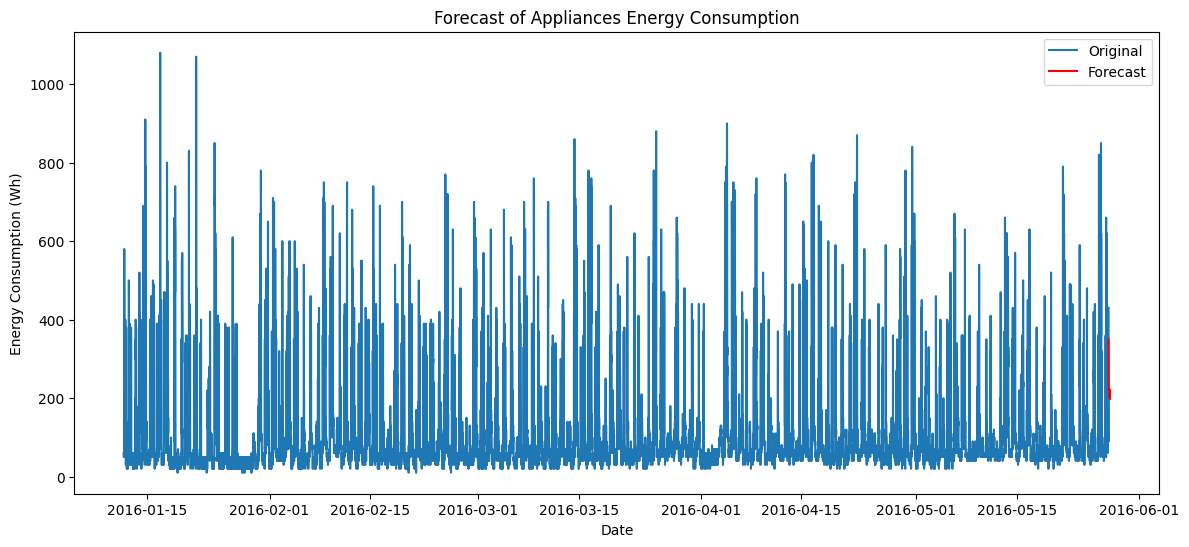

Mean Absolute Error: 100.49886838016815
Mean Squared Error: 13065.796295519245


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('../../dataset/KAG_energydata_complete.csv')

# Convert the 'date' column to datetime format and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Focusing on the 'Appliances' energy consumption
series = df['Appliances']

# Fit the SARIMA model with the chosen parameters
model = SARIMAX(series,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 24),
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Print summary of the model
print(model_fit.summary())

# Forecast
forecast_steps = 30  # Forecast for 30 time steps ahead
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(14, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Forecast of Appliances Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.show()

# Evaluate the model
y_train = series[:-forecast_steps]
y_test = series[-forecast_steps:]
y_pred = forecast

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
